# Árvore de Decisão.
Um modelo de Árvore de Decisão é um algoritmo de aprendizado de máquina supervisionado que é amplamente utilizado para tarefas de classificação e regressão. Ele cria uma estrutura em forma de árvore, onde cada nó interno representa um teste em um atributo e cada ramo representa o resultado desse teste. O modelo divide recursivamente o conjunto de dados com base nos valores dos atributos até que uma decisão final seja alcançada nas folhas da árvore.

Na construção de uma árvore de decisão, o algoritmo procura dividir os dados de forma a maximizar a pureza ou a homogeneidade das amostras em cada ramo. Para classificação, isso significa que cada ramo da árvore deve conter principalmente amostras de uma única classe. Para regressão, procura-se minimizar a variância dos valores de resposta em cada ramo.

Uma vez construída a árvore, para fazer uma previsão ou tomar uma decisão sobre um novo exemplo, o algoritmo segue o caminho apropriado da raiz até uma folha, com base nos testes realizados nos atributos. A classe ou o valor previsto na folha correspondente é então atribuído ao exemplo.

As árvores de decisão têm várias vantagens, incluindo a capacidade de lidar com dados numéricos e categóricos, a interpretabilidade das regras aprendidas e a facilidade de explicação do modelo. No entanto, elas também podem ser suscetíveis a overfitting (ajuste excessivo aos dados de treinamento) e podem não ser tão eficazes em conjuntos de dados com muitos atributos correlacionados.

Existem várias variações e aprimoramentos dos modelos de árvore de decisão, como árvores de decisão aleatórias (Random Forests) e gradient boosting trees, que combinam várias árvores para melhorar o desempenho e reduzir o overfitting.

Vamos utilizar o conjunto de dados "Titanic" disponível no repositório do Kaggle para fornecer um exemplo do modelo de Árvore de Decisão em Python. O conjunto de dados contém informações sobre os passageiros do Titanic, incluindo se eles sobreviveram ou não. Vamos carregar o conjunto de dados, pré-processá-lo e treinar um modelo de Árvore de Decisão para prever a sobrevivência dos passageiros.

Passo 1: Importando as bibliotecas necessárias
Vamos começar importando as bibliotecas necessárias para trabalhar com o modelo de Árvore de Decisão.

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**pandas** é uma biblioteca popular para manipulação e análise de dados.

**train_test_split** é uma função do Scikit-learn que nos permite dividir nosso conjunto de dados em subconjuntos de treinamento e teste.

**DecisionTreeClassifier** é a classe que implementa o modelo de Árvore de Decisão no Scikit-learn.

**accuracy_score** é uma função que calcula a acurácia do modelo.

Passo 2: Carregando o conjunto de dados
Vamos carregar o conjunto de dados Titanic usando a biblioteca Pandas.

In [76]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**url** é a URL do arquivo CSV contendo o conjunto de dados.

**pd.read_csv(url)** carrega o conjunto de dados a partir da URL e o armazena em um DataFrame do Pandas chamado data.

Passo 3: Pré-processamento dos dados
Neste exemplo, vamos pré-processar os dados removendo algumas colunas que não são relevantes para a previsão da sobrevivência dos passageiros.

In [77]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data = data.dropna()  # Removendo linhas com valores ausentes
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


**data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)** remove as colunas 'PassengerId', 'Name', 'Ticket' e 'Cabin' do DataFrame data.

**data.dropna()** remove as linhas do DataFrame data que contêm valores ausentes.

Passo 4: Separando os dados em atributos de entrada e rótulos de saída
Vamos separar os dados em atributos de entrada (X) e rótulos de saída (y).

In [78]:
# Codificação one-hot das variáveis categóricas
data_encoded = pd.get_dummies(data)

In [79]:
# Separar variáveis de entrada (X) e rótulos (y)
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [80]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0,0,1,0
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


**data.drop('Survived', axis=1)** retorna um DataFrame contendo apenas os atributos de entrada, removendo a coluna 'Survived'.

**data['Survived']** retorna uma Series contendo os rótulos de saída.

Passo 5: Dividindo os dados em conjuntos de treinamento e teste
Vamos dividir os dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
472,2,33.0,1,2,27.7500,1,0,0,0,1
432,2,42.0,1,0,26.0000,1,0,0,0,1
666,2,25.0,0,0,13.0000,0,1,0,0,1
30,1,40.0,0,0,27.7208,0,1,1,0,0
291,1,19.0,1,0,91.0792,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
93,3,26.0,1,2,20.5750,0,1,0,0,1
135,2,23.0,0,0,15.0458,0,1,1,0,0
338,3,45.0,0,0,8.0500,0,1,0,0,1
549,2,8.0,1,1,36.7500,0,1,0,0,1


In [83]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
641,1,24.0,0,0,69.3000,1,0,1,0,0
496,1,54.0,1,0,78.2667,1,0,1,0,0
262,1,52.0,1,1,79.6500,0,1,0,0,1
311,1,18.0,2,2,262.3750,1,0,1,0,0
551,2,27.0,0,0,26.0000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
362,3,45.0,0,1,14.4542,1,0,1,0,0
56,2,21.0,0,0,10.5000,1,0,0,0,1
137,1,37.0,1,0,53.1000,0,1,0,0,1
651,2,18.0,0,1,23.0000,1,0,0,0,1


In [84]:
y_train

472    1
432    1
666    0
30     0
291    1
      ..
93     0
135    0
338    1
549    1
131    0
Name: Survived, Length: 569, dtype: int64

In [85]:
y_test

641    1
496    1
262    0
311    1
551    0
      ..
362    0
56     1
137    0
651    1
74     1
Name: Survived, Length: 143, dtype: int64

**train_test_split(X, y, test_size=0.2, random_state=42)** divide os dados de entrada (X) e rótulos de saída (y) em conjuntos de treinamento e teste.

Neste exemplo, usamos 20% dos dados para teste.
Passo 6: Criando e treinando o modelo de Árvore de Decisão
Agora, vamos criar uma instância do modelo de Árvore de Decisão e treiná-lo usando os dados de treinamento.

In [86]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

**DecisionTreeClassifier()** cria uma instância do modelo de Árvore de Decisão.

**clf.fit(X_train, y_train)** treina o modelo usando os dados de treinamento.

Passo 7: Fazendo previsões e avaliando o modelo
Vamos fazer previsões usando os dados de teste e avaliar o desempenho do modelo de Árvore de Decisão.

In [87]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.6993006993006993


**clf.predict(X_test)** faz previsões usando os dados de teste.

**accuracy_score(y_test, y_pred)** calcula a acurácia do modelo comparando as previsões (y_pred) com os rótulos reais (y_test).

print("Acurácia:", accuracy) exibe a acurácia do modelo.

A acurácia de um modelo de classificação, como a Árvore de Decisão, é uma métrica que indica a proporção de classificações corretas em relação ao total de classificações feitas pelo modelo. Em outras palavras, é a taxa de acertos do modelo.

A fórmula para calcular a acurácia é a seguinte:

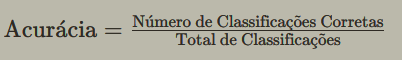

Por exemplo, se temos um modelo que fez 100 classificações, das quais 80 estão corretas, a acurácia seria 80/100 = 0.8, ou seja, 80%.

A acurácia é uma métrica simples e intuitiva que nos dá uma ideia geral do desempenho do modelo. No entanto, ela pode não ser a métrica mais adequada em todos os casos, especialmente se houver desbalanceamento de classes no conjunto de dados.

Por exemplo, se tivermos um conjunto de dados em que uma classe é muito mais comum do que as outras, um modelo que simplesmente prediz sempre a classe mais comum terá uma alta acurácia, mas pode não ser muito útil na prática.

Por esse motivo, é importante considerar outras métricas além da acurácia, como precisão, recall, F1-score, entre outras, dependendo do contexto do problema.

## Exemplo completo

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data = data.dropna()

# Codificação one-hot das variáveis categóricas
data_encoded = pd.get_dummies(data)

# Separar variáveis de entrada (X) e rótulos (y)
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = clf.predict(X_test)

# Calcular e imprimir a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Acurácia: 0.6853146853146853


## Utilizando outro dataset

Acurácia: 1.0


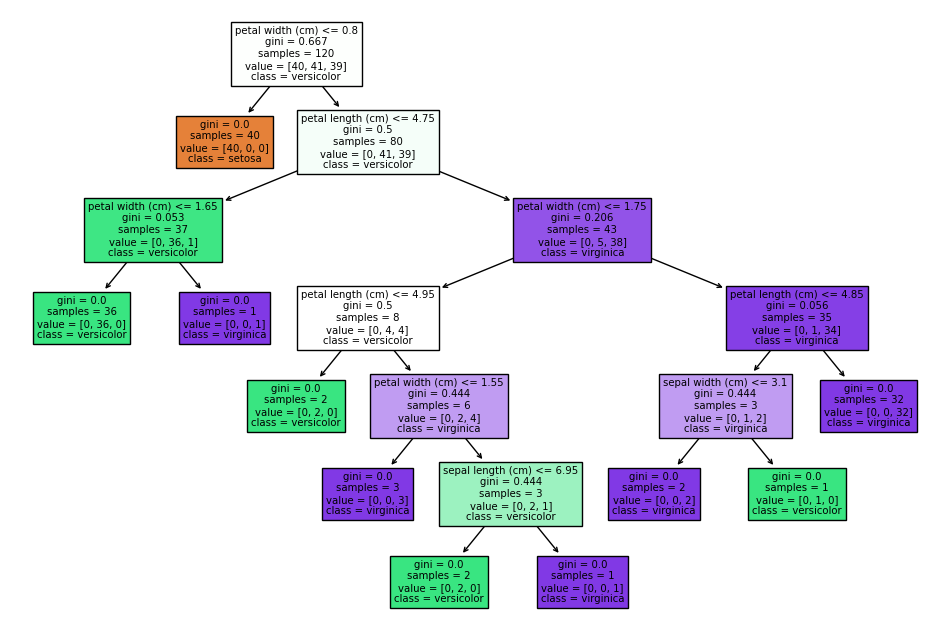

In [89]:
# Passo 1: Importar as bibliotecas necessárias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Passo 2: Carregar o conjunto de dados
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Variável alvo (classe)

# Passo 3: Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Criar o objeto do classificador de Árvore de Decisão
clf = DecisionTreeClassifier()

# Passo 5: Treinar o modelo usando os dados de treinamento
clf.fit(X_train, y_train)

# Passo 6: Fazer previsões usando o modelo treinado
y_pred = clf.predict(X_test)

# Passo 7: Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Visualizar a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()



**Visualização da Árvore de Decisão:**

Usamos plot_tree para visualizar a árvore de decisão treinada.
O gráfico mostra como o modelo toma decisões com base nas características.

A visualização da árvore de decisão é uma representação gráfica do modelo que nos permite entender como o algoritmo está tomando decisões com base nos atributos (ou características) dos dados. Vamos analisar os principais elementos dessa visualização:

Nós (Nodes):

Os pontos onde o algoritmo faz uma pergunta sobre uma característica dos dados. Por exemplo, "O comprimento da pétala é menor que 2.45?"
Divisões (Branches):

As linhas que conectam os nós e representam as diferentes opções que o algoritmo pode seguir com base na resposta para a pergunta.
Folhas (Leaves):

Os pontos finais da árvore onde uma decisão é tomada. Cada folha representa uma classe ou valor de saída.
Critério de Divisão:

Em cada nó, o algoritmo escolhe uma característica e um valor de corte para dividir os dados em subgrupos. Isso é feito com base em um critério como Gini impurity ou entropia.
Classificação nas Folhas:

Nas folhas, a árvore fornece a classe prevista ou o valor de saída.
Cores e Tamanho das Folhas:

Nas visualizações coloridas, a cor das folhas pode representar a classe predominante na folha. O tamanho das folhas pode representar o número de amostras.
A visualização ajuda a entender como o modelo toma decisões complexas com base em regras simples. Isso pode ser útil para interpretabilidade e depuração do modelo.

Por exemplo, ao olhar para a visualização da árvore de decisão, podemos seguir o caminho de um ponto de dados desde o nó raiz até a folha para entender como o modelo fez a previsão para aquele ponto específico.

# Outro exemplo
Neste exemplo, temos uma aplicação do modelo de árvore de decisão em Python. Utilizaremos o dataset "Wine Recognition" que está disponível no repositório UCI Machine Learning Repository. Este dataset é usado para classificar vinhos em uma de três classes.

In [90]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

# Carregando o dataset Wine Quality
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
dados = pd.read_csv(url, delimiter=';')
dados

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [91]:

# Visualizando as primeiras linhas do dataset
print(dados.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [92]:
# Separando características (X) e alvo (y)
X = dados.drop('quality', axis=1)
y = dados['quality']

In [93]:
# Dividindo o dataset em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Criando o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
modelo_arvore.fit(X_treino, y_treino)

# Fazendo predições
y_pred = modelo_arvore.predict(X_teste)

Acurácia: 0.559375


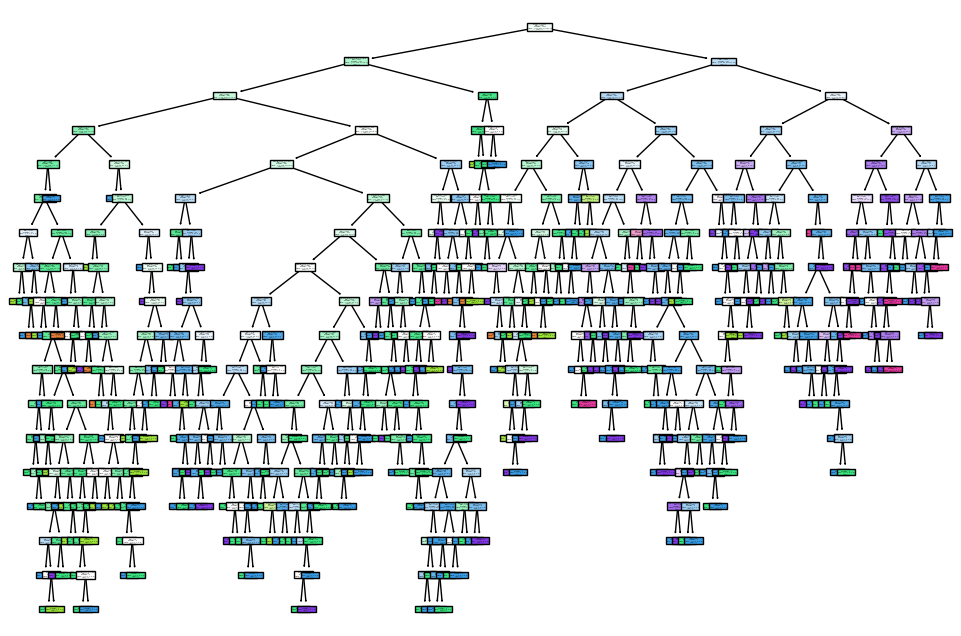

In [95]:
# Calculando a acurácia
acuracia = metrics.accuracy_score(y_teste, y_pred)
print(f'Acurácia: {acuracia}')

# Visualizando a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=[str(i) for i in range(3, 9)])
plt.show()

**Como funciona a classificação?**

O dataset "Wine Recognition" contém características de vinhos (como teor alcoólico, acidez, fenóis, etc.) e uma classe associada a cada vinho (1, 2 ou 3, representando diferentes tipos de vinhos). O modelo de árvore de decisão aprende a distinguir entre essas classes com base nas características. Ele começa com a característica mais discriminativa e faz perguntas como "O teor alcoólico é maior que X?" ou "A acidez é menor que Y?". Com base nas respostas, ele avança para os nós filhos até chegar a uma decisão final sobre a classe do vinho.

**A acurácia do modelo é de 0.559375, o que isso significa?**

A acurácia é uma métrica de avaliação do desempenho de um modelo de classificação. Ela representa a proporção de classificações corretas em relação ao total de classificações feitas pelo modelo. No caso específico do seu modelo, uma acurácia de 0.559375 significa que ele acerta a classe dos vinhos em aproximadamente 55,94% das vezes no conjunto de dados de teste.

Isso sugere que o modelo pode não ser muito preciso para este conjunto de dados específico. Pode haver várias razões para isso, como a complexidade do problema, o tamanho do conjunto de dados ou até mesmo a necessidade de um modelo mais avançado.